<a href="https://colab.research.google.com/github/ChhayaSharma21/EmployeeBurnoutTracker/blob/main/ProjectEBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Library for this Analysis

In [32]:
import numpy as np
import pandas as  pd
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Uploading and Overview of the Dataset

In [33]:
df = pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [34]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [35]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [37]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [38]:
df.shape

(22750, 9)

In [39]:
df.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [40]:
df.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [41]:
df.isnull().sum().values.sum()

4622

# Performing Exploratory Data Analysis



Our target variable, "Burn Rate," along with the "Resource Allocation" and "Mental Fatigue Score" columns, contain NaN values. Since supervised linear regression requires a complete target variable, the 1124 rows with missing values must be removed from the dataframe.

In [42]:
df.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


These two variables, "Resource Allocation" and "Mental Fatigue Score," are strongly correlated with the target variable, making them crucial for accurate estimation.

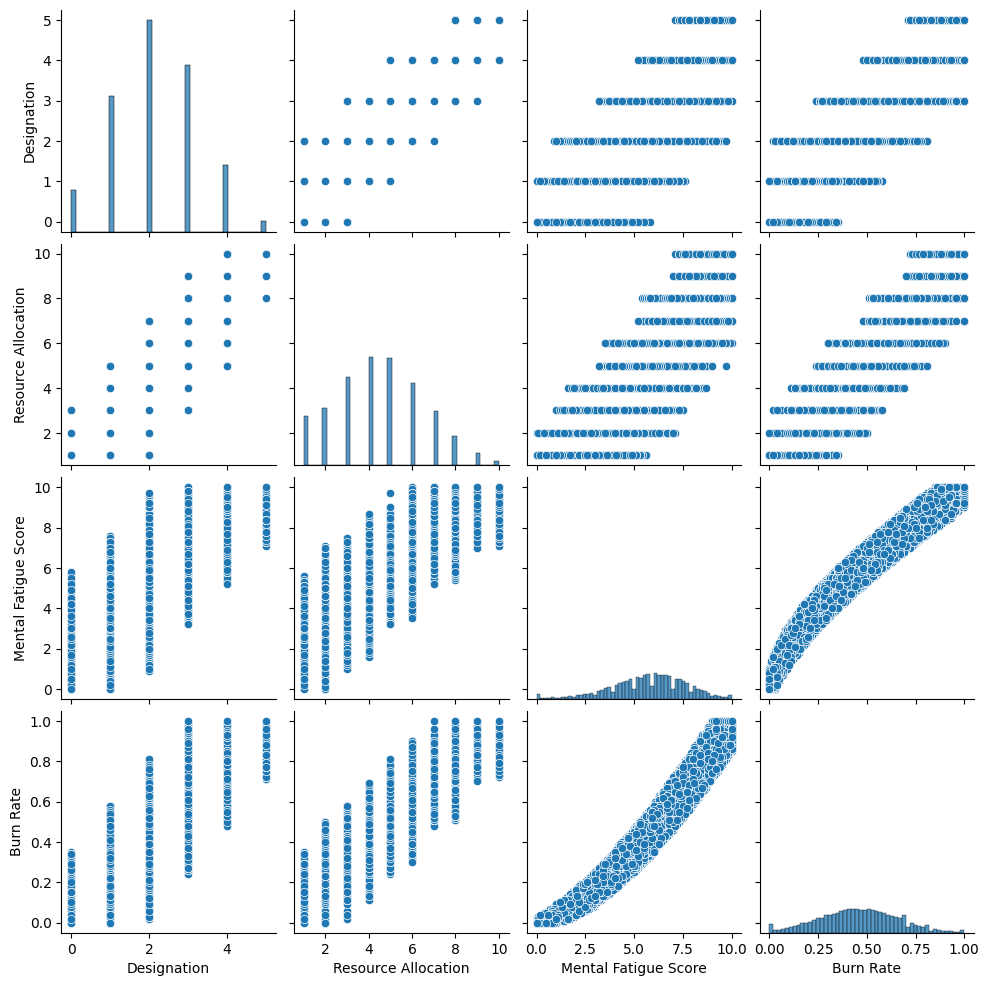

In [43]:
sns.pairplot(df)
plt.show()

Drop off all observations with NaN values of our dataframe

In [44]:
df = df.dropna()

In [15]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29


from matplotlib import pyplot as plt
_df_0['Designation'].plot(kind='hist', bins=20, title='Designation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Resource Allocation'].plot(kind='hist', bins=20, title='Resource Allocation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Mental Fatigue Score'].plot(kind='hist', bins=20, title='Mental Fatigue Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Burn Rate'].plot(kind='hist', bins=20, title='Burn Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Employee ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Company Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('WFH Setup Available').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Designation', y='Resource Allocation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Resource Allocation', y='Mental Fatigue Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Mental Fatigue Score', y='Burn Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Joining']
  ys = series['Designation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date of Joining', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Employee ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Employee ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Joining')
_ = plt.ylabel('Designation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Joining']
  ys = series['Designation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date of Joining', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Joining')
_ = plt.ylabel('Designation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Joining']
  ys = series['Designation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Date of Joining', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Joining')
_ = plt.ylabel('Designation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Joining']
  ys = series['Designation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Date of Joining', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WFH Setup Available')):
  _plot_series(series, series_name, i)
  fig.legend(title='WFH Setup Available', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Joining')
_ = plt.ylabel('Designation')

from matplotlib import pyplot as plt
_df_15['Designation'].plot(kind='line', figsize=(8, 4), title='Designation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Resource Allocation'].plot(kind='line', figsize=(8, 4), title='Resource Allocation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Mental Fatigue Score'].plot(kind='line', figsize=(8, 4), title='Mental Fatigue Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Burn Rate'].plot(kind='line', figsize=(8, 4), title='Burn Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in _df_19.groupby('Employee ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Employee ID')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Company Type'].value_counts()
    for x_label, grp in _df_20.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Company Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WFH Setup Available'].value_counts()
    for x_label, grp in _df_21.groupby('Company Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company Type')
_ = plt.ylabel('WFH Setup Available')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Employee ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Designation', y='Employee ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Designation', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Company Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Designation', y='Company Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['WFH Setup Available'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Designation', y='WFH Setup Available', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

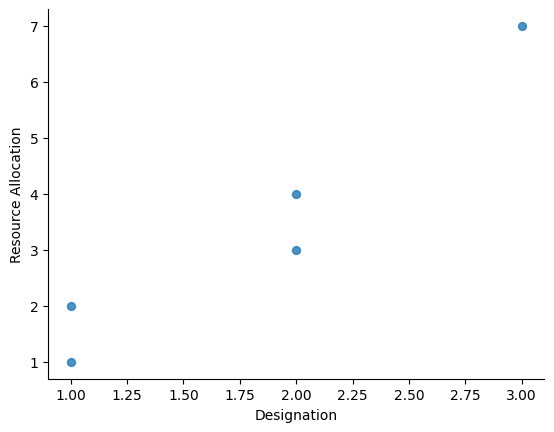

In [45]:
from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Designation', y='Resource Allocation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

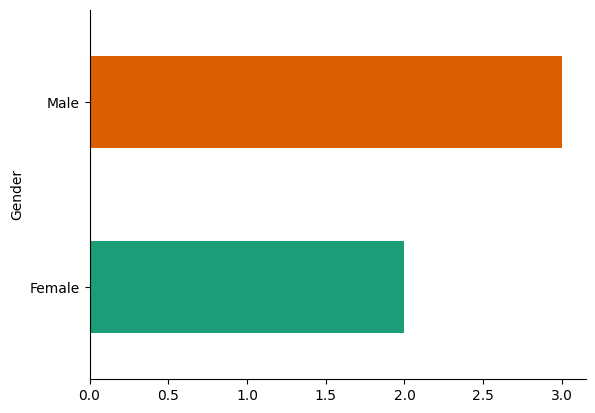

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
df.shape

(18590, 9)

Analyzing the type of data for each variable involves identifying whether a variable is numerical, categorical, or ordinal.

In [48]:
df.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


Reviewing the range, unique entries, and distribution of values for each variable to identify patterns and preprocessing needs

In [49]:
df_obj = df.select_dtypes(object) # prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : df_obj[c].unique()[:10] for c in df_obj.columns})

{'Company Type': array(['Service', 'Product'], dtype=object),
 'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


The employee IDs do not provide any useful information for the analysis and should therefore be dropped from the dataset.

In [50]:
df = df.drop('Employee ID', axis = 1)

In [22]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29


from matplotlib import pyplot as plt
_df_26['Designation'].plot(kind='hist', bins=20, title='Designation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Resource Allocation'].plot(kind='hist', bins=20, title='Resource Allocation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Mental Fatigue Score'].plot(kind='hist', bins=20, title='Mental Fatigue Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Burn Rate'].plot(kind='hist', bins=20, title='Burn Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('Company Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('WFH Setup Available').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='Designation', y='Resource Allocation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='Resource Allocation', y='Mental Fatigue Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='Mental Fatigue Score', y='Burn Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Joining']
  ys = series['Designation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('Date of Joining', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Joining')
_ = plt.ylabel('Designation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Joining']
  ys = series['Designation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('Date of Joining', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Joining')
_ = plt.ylabel('Designation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Joining']
  ys = series['Designation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('Date of Joining', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WFH Setup Available')):
  _plot_series(series, series_name, i)
  fig.legend(title='WFH Setup Available', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Joining')
_ = plt.ylabel('Designation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Joining']
  ys = series['Resource Allocation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('Date of Joining', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Joining')
_ = plt.ylabel('Resource Allocation')

from matplotlib import pyplot as plt
_df_40['Designation'].plot(kind='line', figsize=(8, 4), title='Designation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['Resource Allocation'].plot(kind='line', figsize=(8, 4), title='Resource Allocation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['Mental Fatigue Score'].plot(kind='line', figsize=(8, 4), title='Mental Fatigue Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['Burn Rate'].plot(kind='line', figsize=(8, 4), title='Burn Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Company Type'].value_counts()
    for x_label, grp in _df_44.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Company Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WFH Setup Available'].value_counts()
    for x_label, grp in _df_45.groupby('Company Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company Type')
_ = plt.ylabel('WFH Setup Available')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='Designation', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_47['Company Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_47, x='Designation', y='Company Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['WFH Setup Available'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='Designation', y='WFH Setup Available', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='Resource Allocation', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

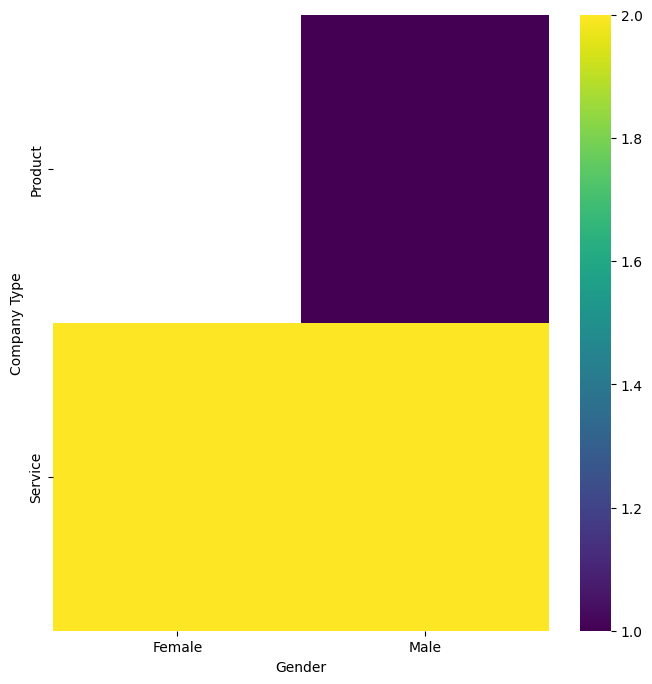

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Company Type'].value_counts()
    for x_label, grp in _df_44.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Company Type')

Checking the correlation between "Date of Joining" and the target variable to assess its potential relationship and impact on the analysis.

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

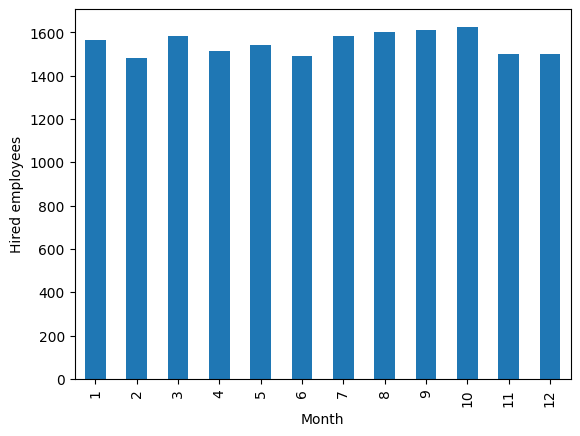

In [23]:
print(f"Min date {df['Date of Joining'].min()}")
print(f"Max date {df['Date of Joining'].max()}")
df_month = df.copy()

df_month["Date of Joining"] = df_month['Date of Joining']
df_month["Date of Joining"].groupby(
    df_month['Date of Joining'].dt.month
).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")


In [52]:
df_2008 = pd.to_datetime(["2008-01-01"]*len(df))
df["Days"] = df['Date of Joining'].sub(df_2008).dt.days
df.Days

,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [53]:
df.corr(numeric_only=True)['Burn Rate'][:]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days,0.000309


Dropping the "Date of Joining" and "Days" columns as they are not relevant for the analysis.

In [54]:
df = df.drop(['Date of Joining','Days'], axis = 1)

In [55]:
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


from matplotlib import pyplot as plt
_df_50['Designation'].plot(kind='hist', bins=20, title='Designation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Resource Allocation'].plot(kind='hist', bins=20, title='Resource Allocation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52['Mental Fatigue Score'].plot(kind='hist', bins=20, title='Mental Fatigue Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53['Burn Rate'].plot(kind='hist', bins=20, title='Burn Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_54.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_55.groupby('Company Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_56.groupby('WFH Setup Available').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x='Designation', y='Resource Allocation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58.plot(kind='scatter', x='Resource Allocation', y='Mental Fatigue Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='Mental Fatigue Score', y='Burn Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60['Designation'].plot(kind='line', figsize=(8, 4), title='Designation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Resource Allocation'].plot(kind='line', figsize=(8, 4), title='Resource Allocation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['Mental Fatigue Score'].plot(kind='line', figsize=(8, 4), title='Mental Fatigue Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63['Burn Rate'].plot(kind='line', figsize=(8, 4), title='Burn Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Company Type'].value_counts()
    for x_label, grp in _df_64.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Company Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WFH Setup Available'].value_counts()
    for x_label, grp in _df_65.groupby('Company Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company Type')
_ = plt.ylabel('WFH Setup Available')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_66['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_66, x='Designation', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_67['Company Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_67, x='Designation', y='Company Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_68['WFH Setup Available'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_68, x='Designation', y='WFH Setup Available', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_69['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_69, x='Resource Allocation', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Visualizing the distribution of categorical variables using count plots to understand their frequency and patterns.







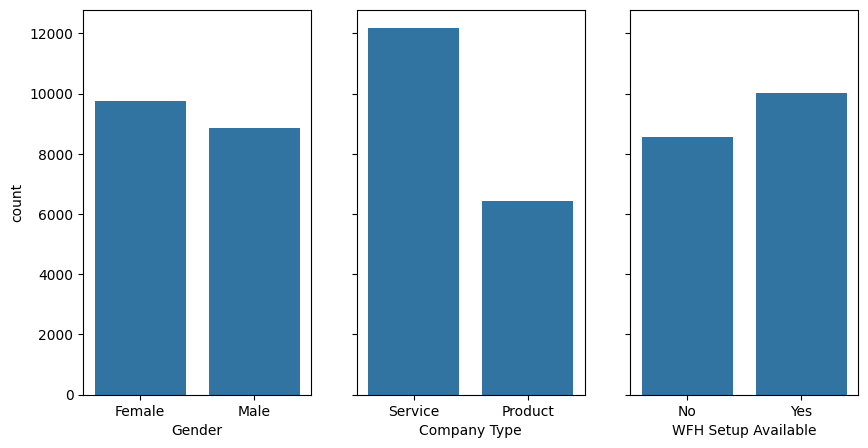

In [56]:
cat_columns = df.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=df, ax=ax[i])
plt.show()

The number of observations for each category across variables is fairly balanced, except for "Company_Type," where the count of service jobs is nearly double that of product jobs.








Using pair plots with categorical variables as hue to visualize how numeric features vary across different categories.

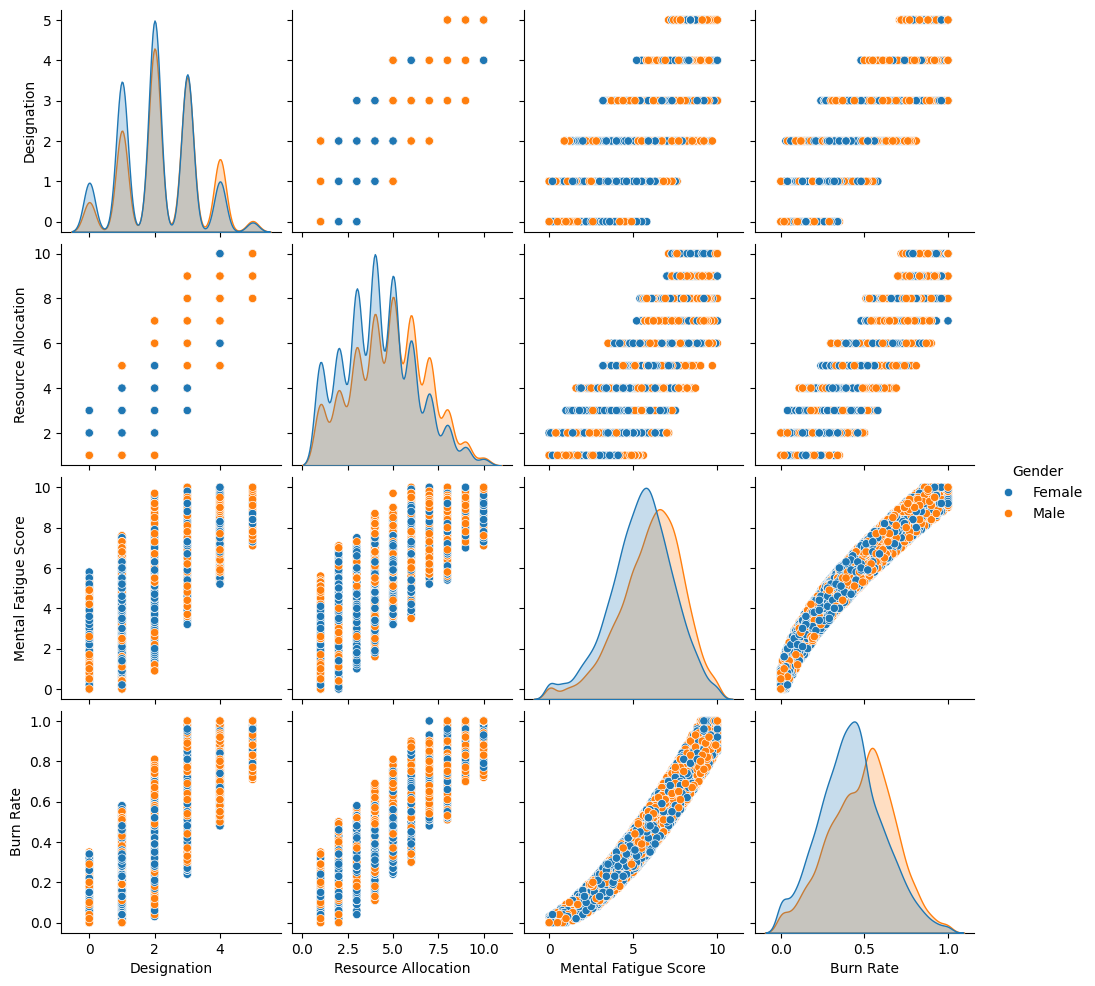

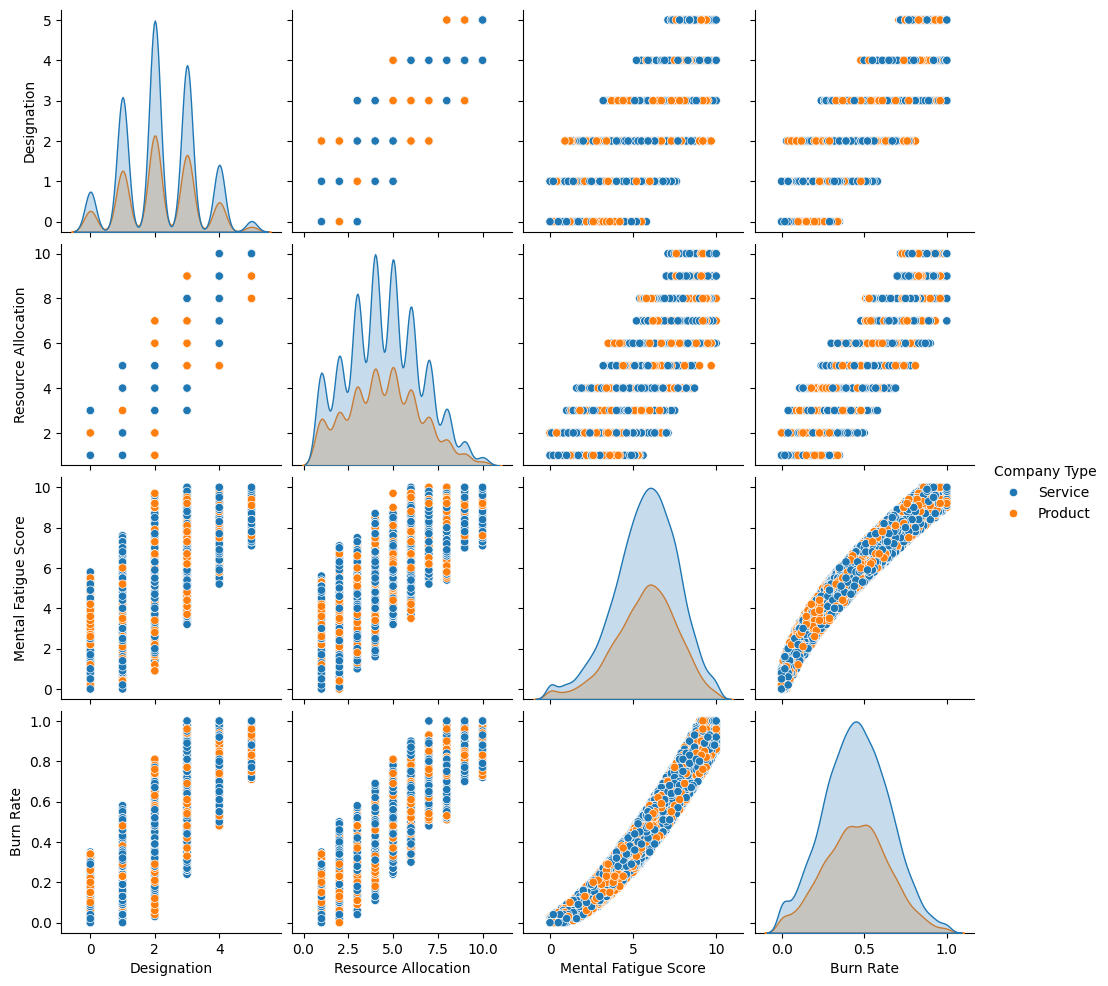

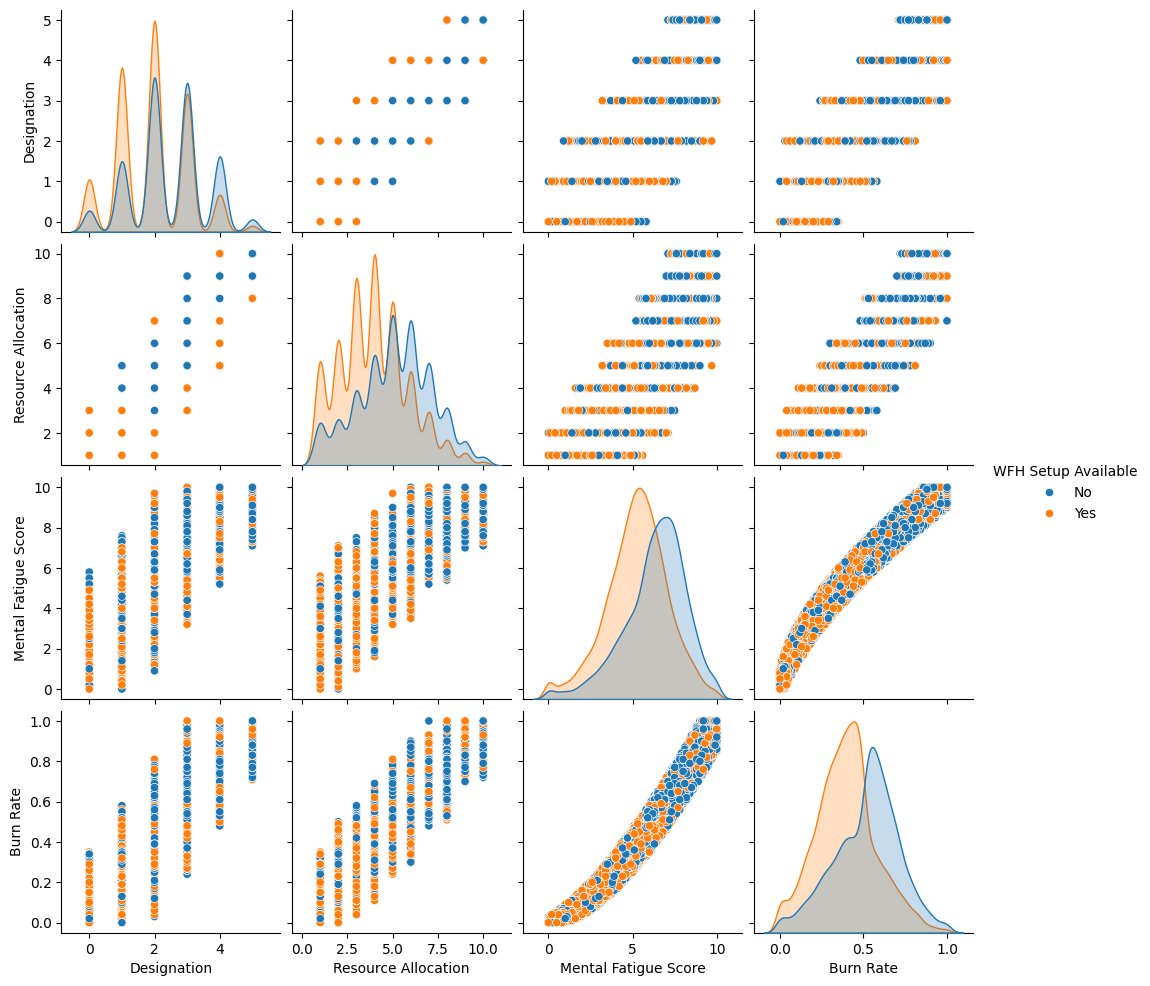

In [57]:
for c in df.select_dtypes(object).columns:
    sns.pairplot(df, hue=c)
plt.show()

In [28]:
df.columns

Index(['Date of Joining', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Gender_Male',
       'Company Type_Service', 'WFH Setup Available_Yes', 'Gender_Male'],
      dtype='object')


# Applying One-Hot Encoding to convert categorical features into numerical format for model compatibility.

In [58]:
df = pd.get_dummies(df, columns=['Gender', 'Company Type', 'WFH Setup Available','Gender'],drop_first=True)
df.head()
encoded_columns = df.columns

# Preprocessing

In [59]:
# Split df into X and y
y = df['Burn Rate']
X = df.drop('Burn Rate', axis=1)

In [60]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [61]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

# Save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [62]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Gender_Male,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,1.051505,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,-0.951018,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,-0.951018,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-0.951018,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,1.051505,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-0.951018,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,1.051505,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,1.051505,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,1.051505,0.724706,-1.082297,1.051505


In [ ]:
y_train

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


In [ ]:
import os

# Define the directory path
path = '../data/processed/'

# Create the directory if it does not exist
os.makedirs(path, exist_ok=True)

# Save the processed data
X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)


# Creating a Linear Regression Model

In [ ]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Linear Regressing Model Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.045950320326447726
R-squared Score: 0.918822674247248


In [ ]:
feature_names = X.columns.tolist()
feature_names

['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Gender_Male',
 'Company Type_Service',
 'WFH Setup Available_Yes',
 'Gender_Male']

In [ ]:
# Save the model to a file
model_filename = '../models/linear_regression.pkl'
with open (model_filename ,'wb') as  model_file:
    pickle.dump(linear_regression_model, model_file)


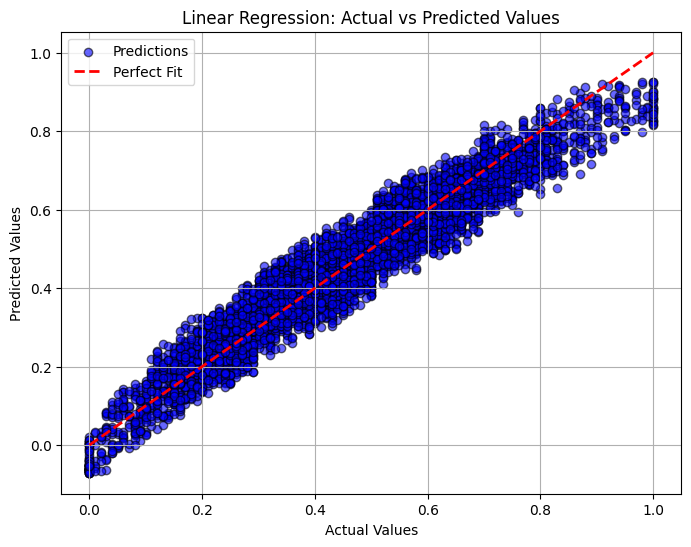

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()
